**RGB**

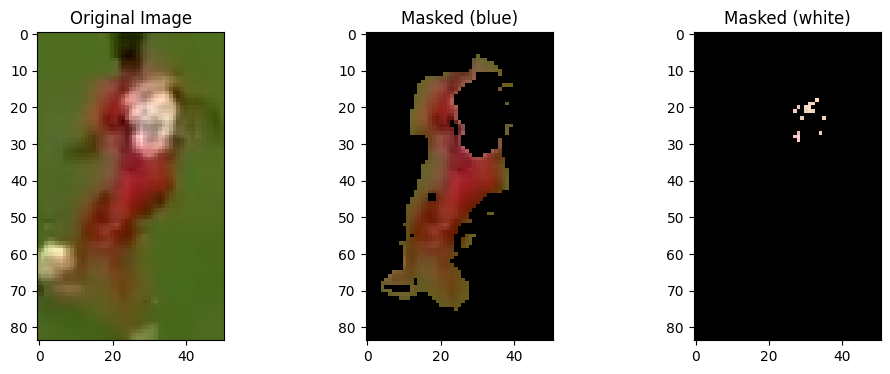

Image: Screenshot_20231030_144827.png, Dominant Color: blue


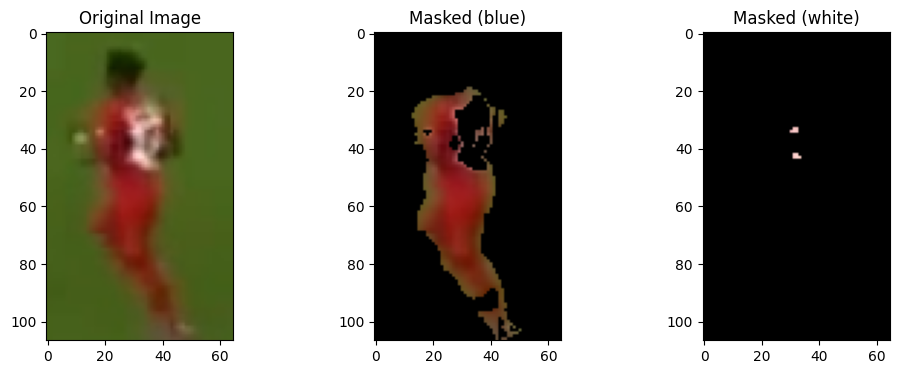

Image: Screenshot_20231030_145309.png, Dominant Color: blue


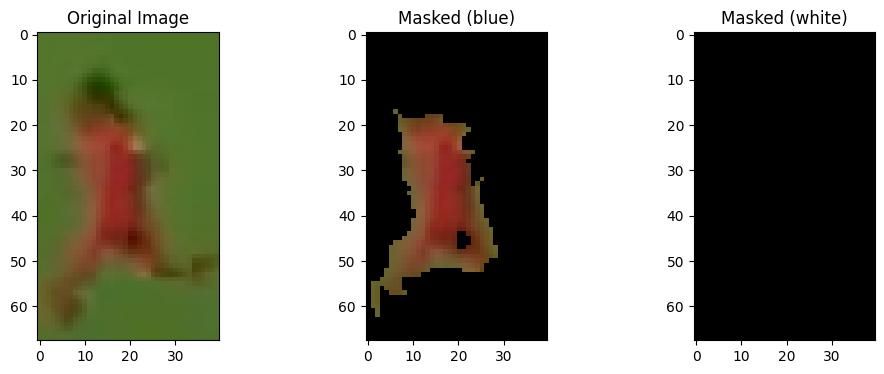

Image: Screenshot_20231030_145327.png, Dominant Color: blue


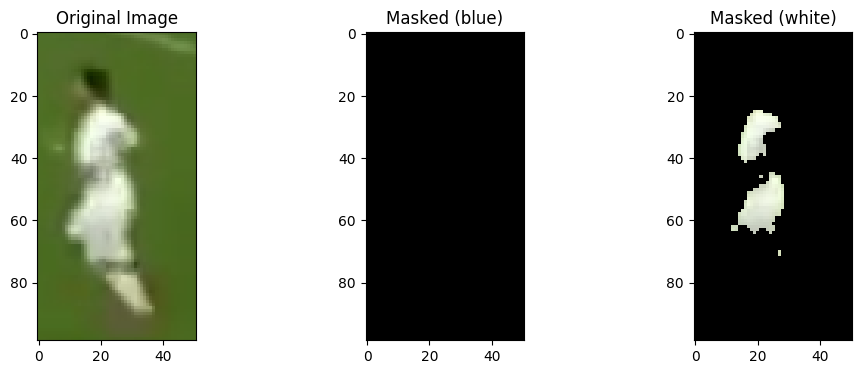

Image: Screenshot_20231030_145317.png, Dominant Color: white


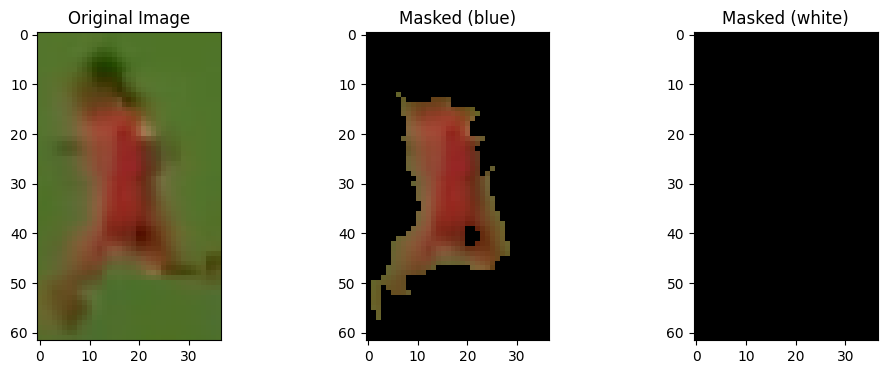

Image: Screenshot_20231030_145245.png, Dominant Color: blue


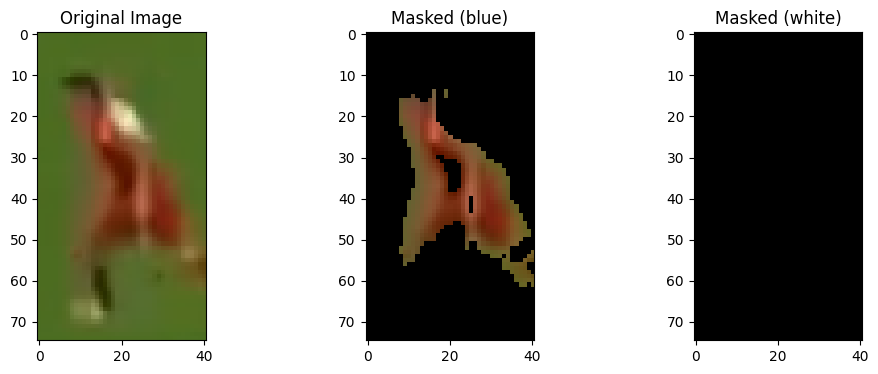

Image: Screenshot_20231030_145146.png, Dominant Color: blue


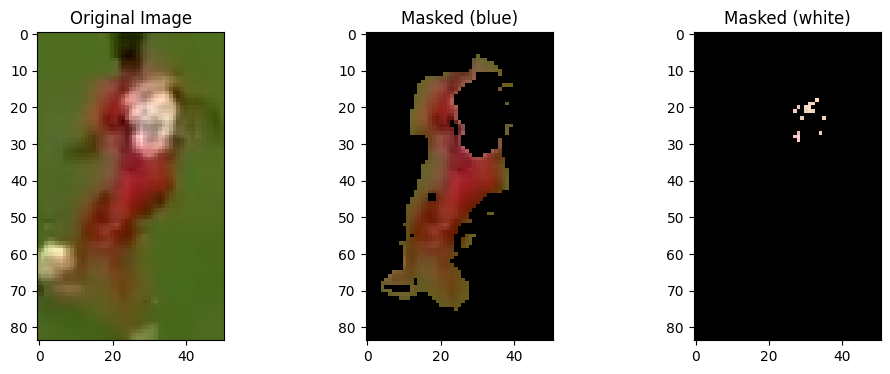

Image: Screenshot_20231030_144827-1.png, Dominant Color: blue


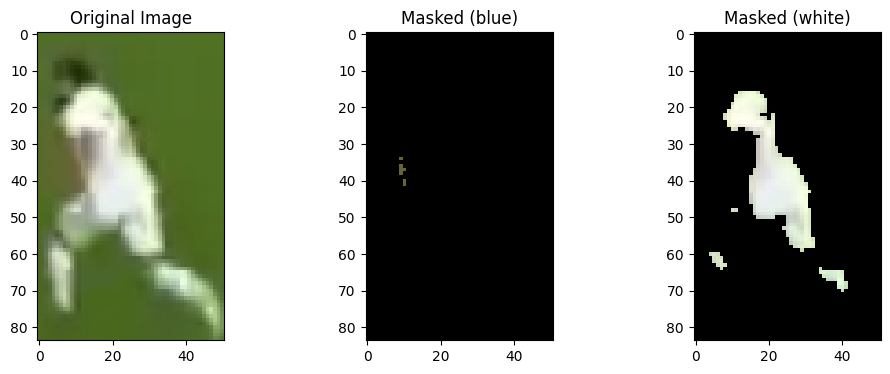

Image: Screenshot_20231030_145118.png, Dominant Color: white


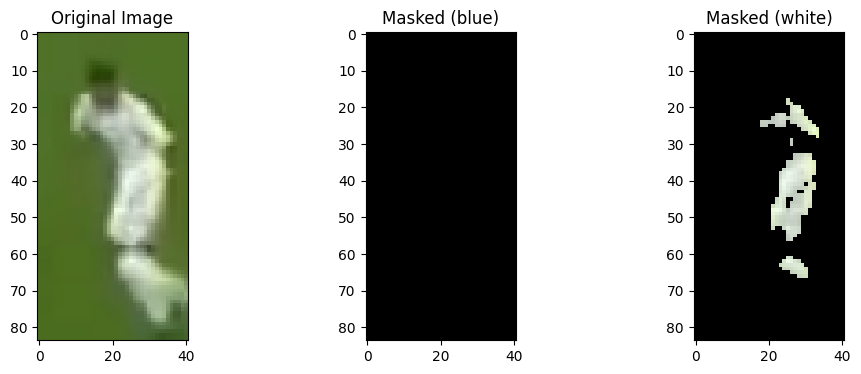

Image: Screenshot_20231030_145133.png, Dominant Color: white


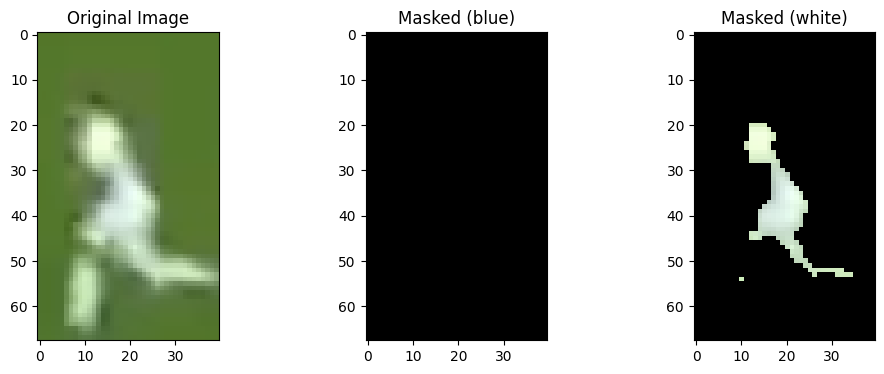

Image: Screenshot_20231030_145332.png, Dominant Color: white


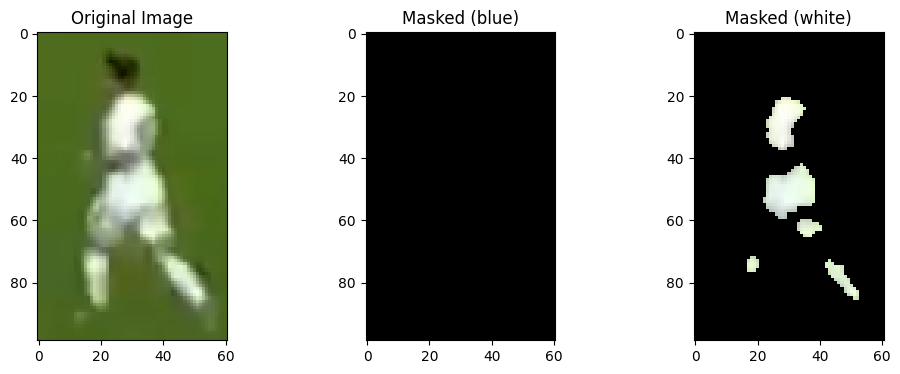

Image: Screenshot_20231030_145350.png, Dominant Color: white


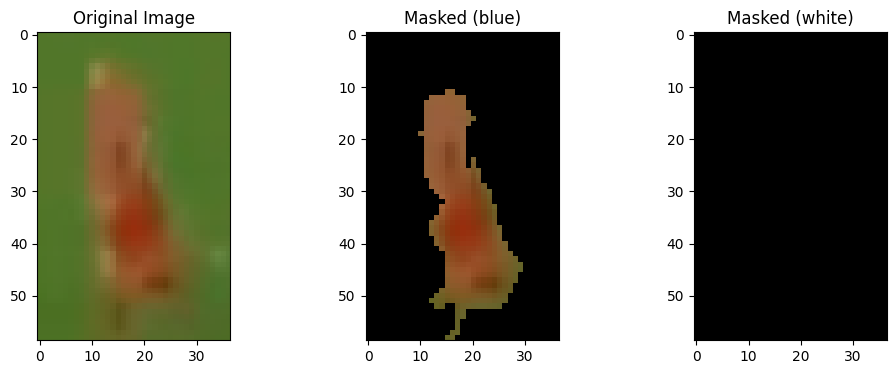

Image: Screenshot_20231030_145210.png, Dominant Color: blue


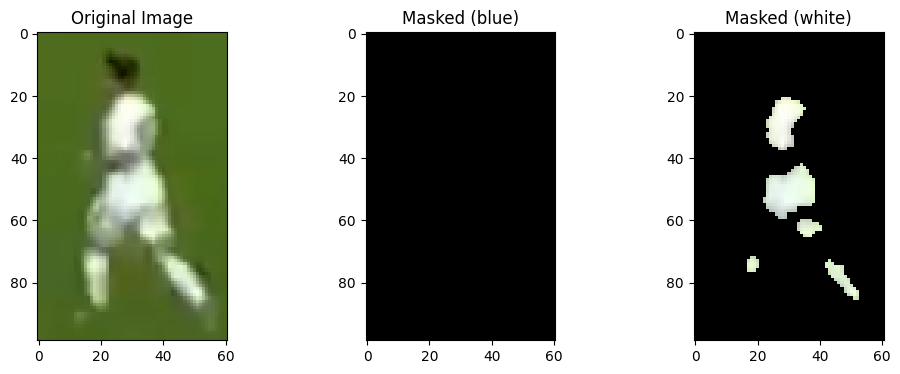

Image: Screenshot_20231030_145344.png, Dominant Color: white


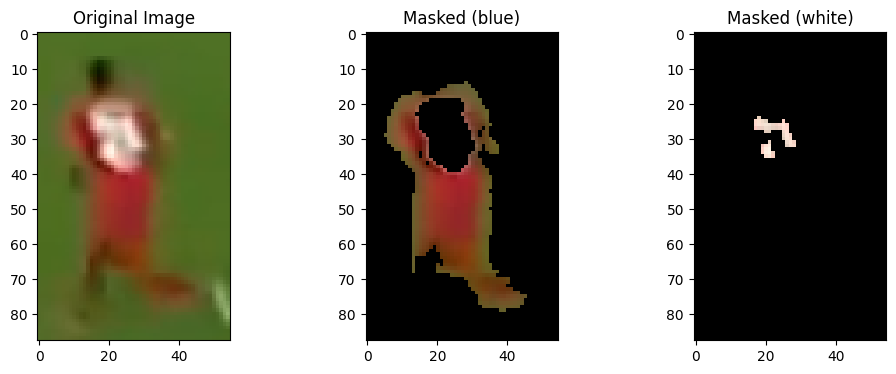

Image: Screenshot_20231030_145258.png, Dominant Color: blue


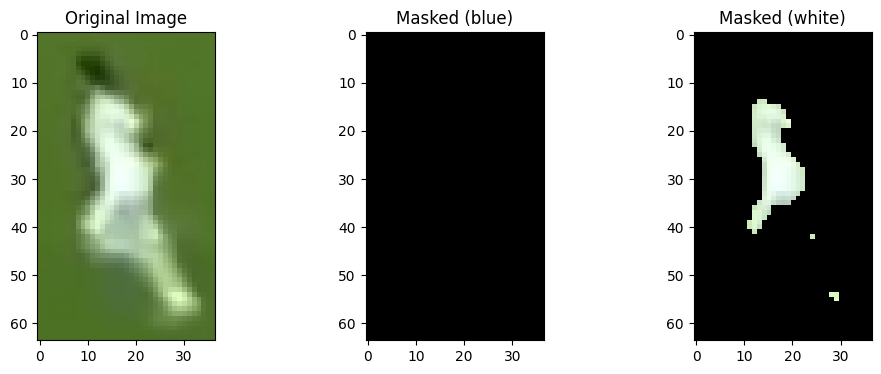

Image: Screenshot_20231030_145158.png, Dominant Color: white


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

color_list = ['blue', 'white']
boundaries = [
    (np.array([0, 0, 100]), np.array([100, 100, 255])),  # blue
    (np.array([187, 169, 112]), np.array([255, 255, 255]))  # whiteba
]

image_folder = 'real_bayern'

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        masked_images = []
        values = []

        for boundary in boundaries:
            mask = cv2.inRange(image, boundary[0], boundary[1])
            masked_images.append(cv2.bitwise_and(image, image, mask=mask))
            non_black_pixels = np.count_nonzero(mask)
            #ratio = non_black_pixels / mask.size
            #ratios.append(ratio)
            values.append(non_black_pixels)

        dominant_color = color_list[0] if values[0] > values[1] else color_list[1]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        for i, masked_image in enumerate(masked_images):
            plt.subplot(1, 3, i + 2)
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Masked ({color_list[i]})')

        plt.show()

        print(f'Image: {filename}, Dominant Color: {dominant_color}')


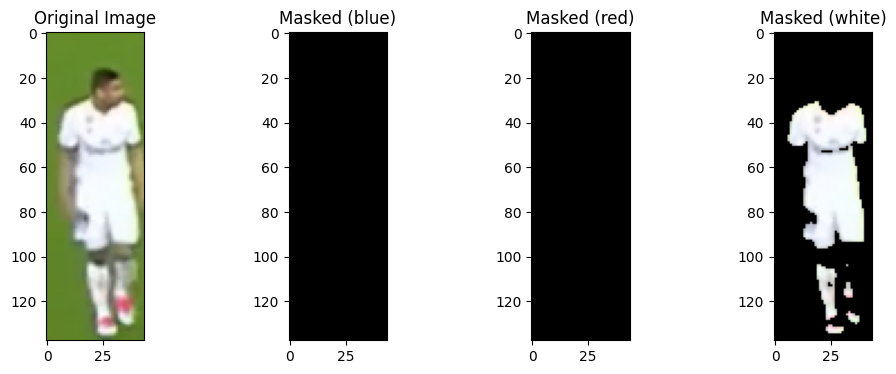

Image: Screenshot_20231029_114841.png, Dominant Color: white


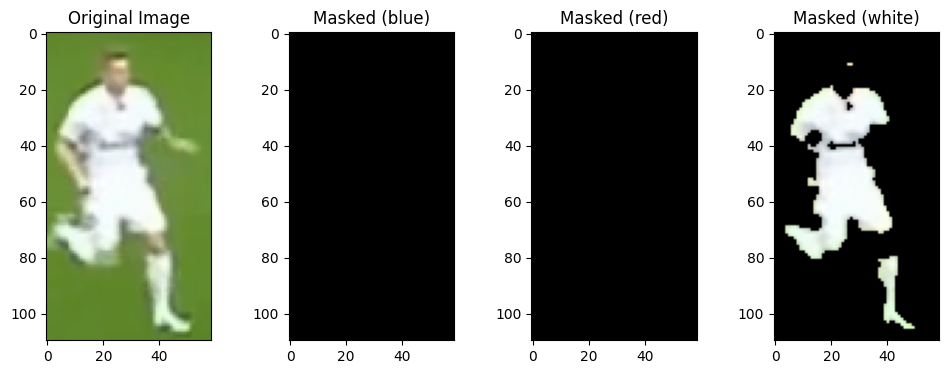

Image: Screenshot_20231029_114841 (3).png, Dominant Color: white


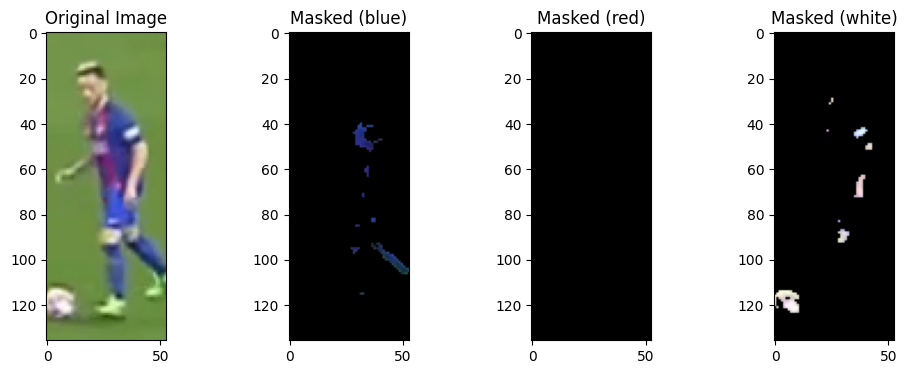

Image: Screenshot_20231029_114841 (6).png, Dominant Color: white


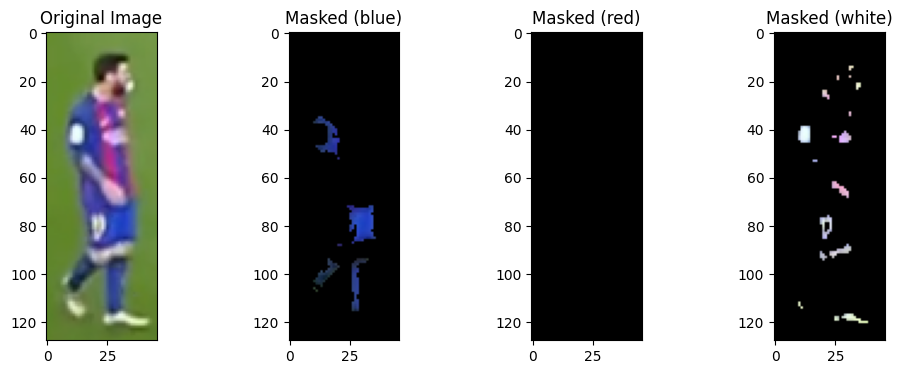

Image: Screenshot_20231029_114841 (1).png, Dominant Color: blue


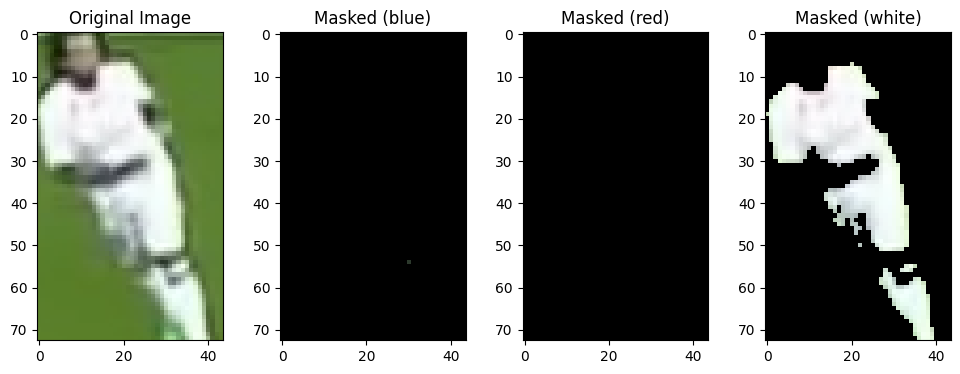

Image: Screenshot_20231029_114841 (4).png, Dominant Color: white


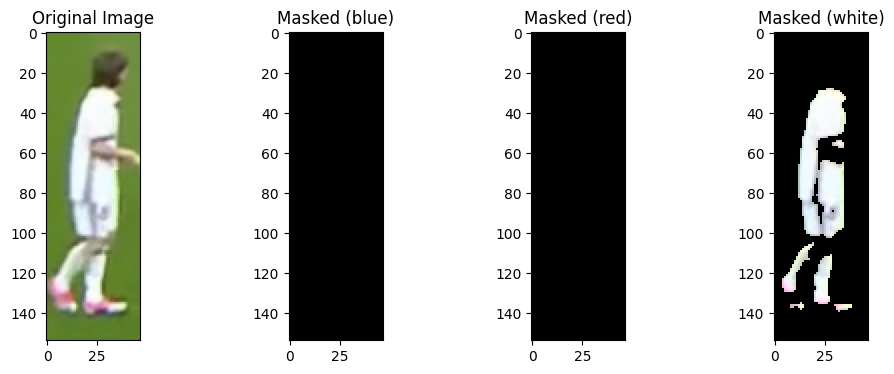

Image: Screenshot_20231029_114841 (2).png, Dominant Color: white


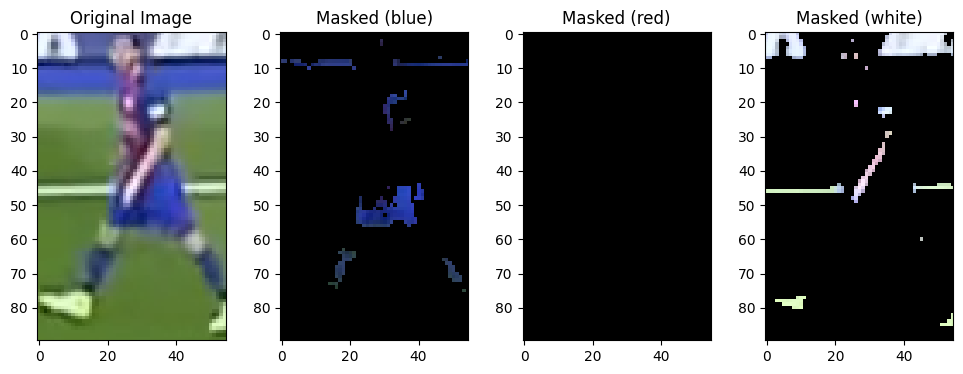

Image: Screenshot_20231029_114841 (5).png, Dominant Color: white


In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

color_list = ['blue', 'red', 'white']  # Include 'red' in the list of colors
boundaries = [
    (np.array([43, 31, 4]), np.array([250, 88, 50])),  # Blue
    (np.array([0, 0, 100]), np.array([50, 50, 255])),  # Red
    (np.array([187, 169, 112]), np.array([255, 255, 255]))  # White
]

image_folder = 'real_barca'

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        masked_images = []
        values = []

        for boundary in boundaries:
            mask = cv2.inRange(image, boundary[0], boundary[1])
            masked_images.append(cv2.bitwise_and(image, image, mask=mask))
            non_black_pixels = np.count_nonzero(mask)
            values.append(non_black_pixels)

        dominant_color = color_list[np.argmax(values)]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        for i, masked_image in enumerate(masked_images):
            plt.subplot(1, 4, i + 2)
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Masked ({color_list[i]})')

        plt.show()

        print(f'Image: {filename}, Dominant Color: {dominant_color}')


**With Gaussian filter**

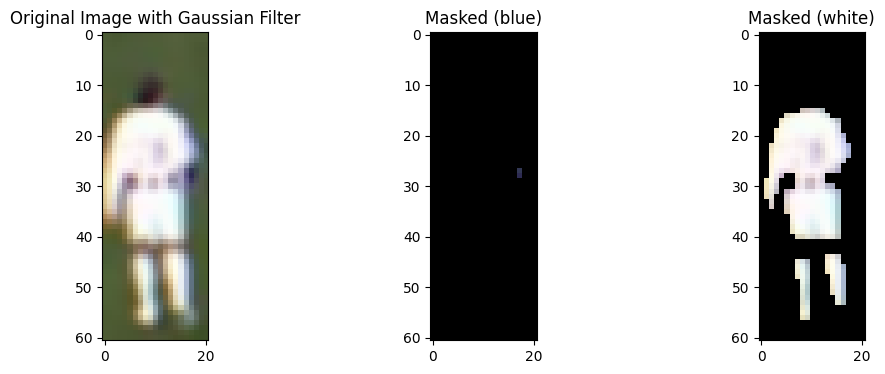

Image: 1.png, Dominant Color: white


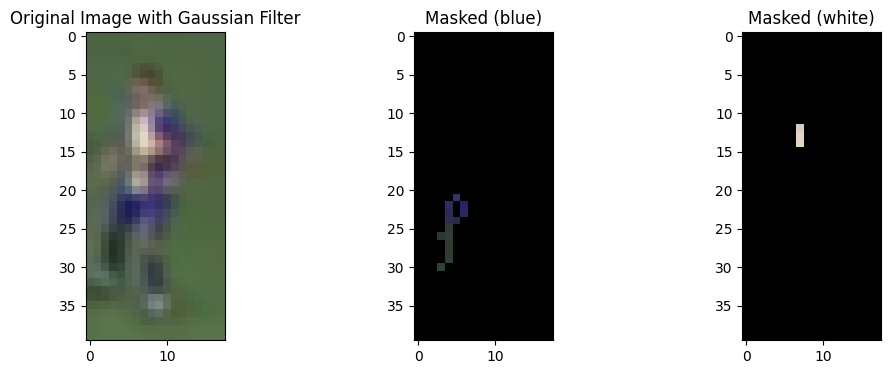

Image: 7.png, Dominant Color: blue


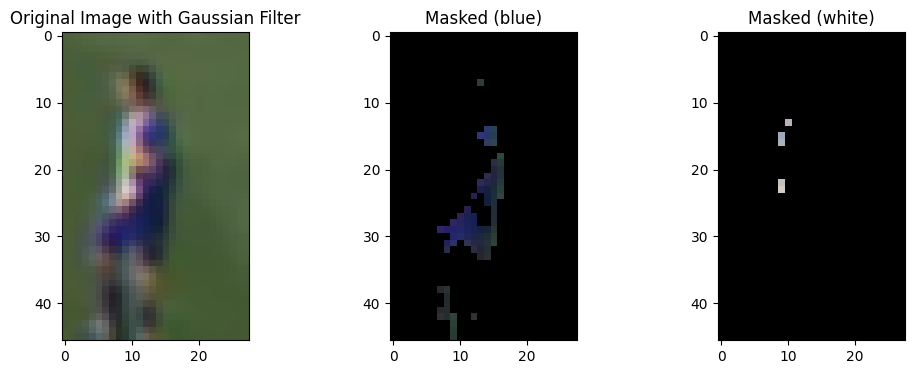

Image: 10.png, Dominant Color: blue


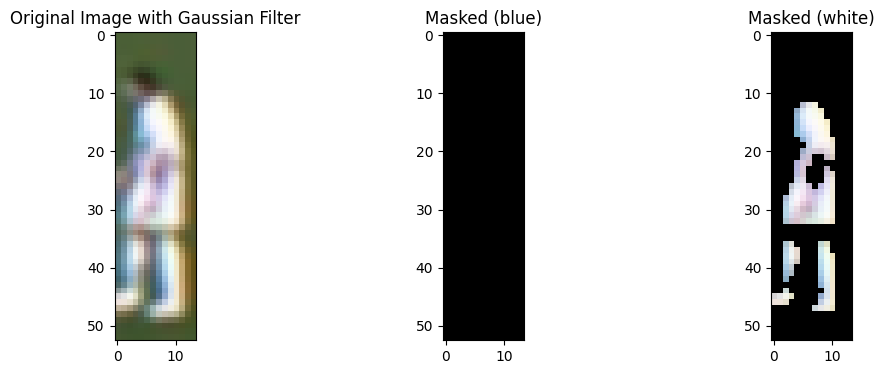

Image: 8.png, Dominant Color: white


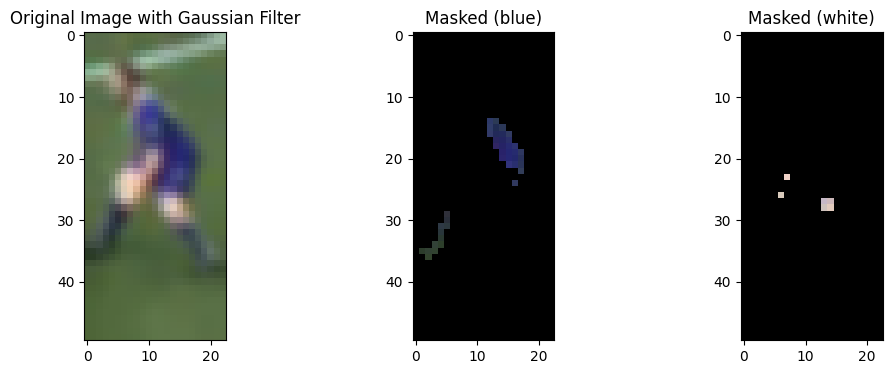

Image: 5.png, Dominant Color: blue


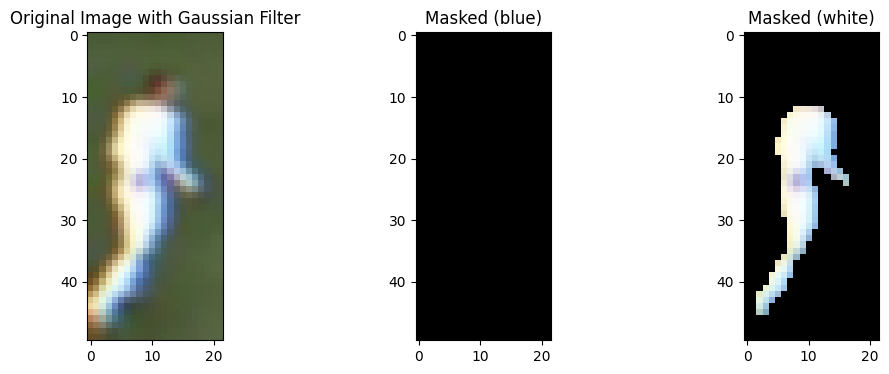

Image: 9.png, Dominant Color: white


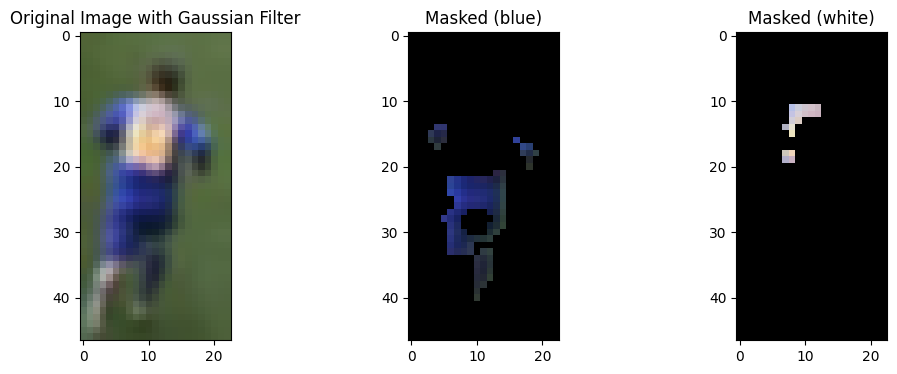

Image: 6.png, Dominant Color: blue


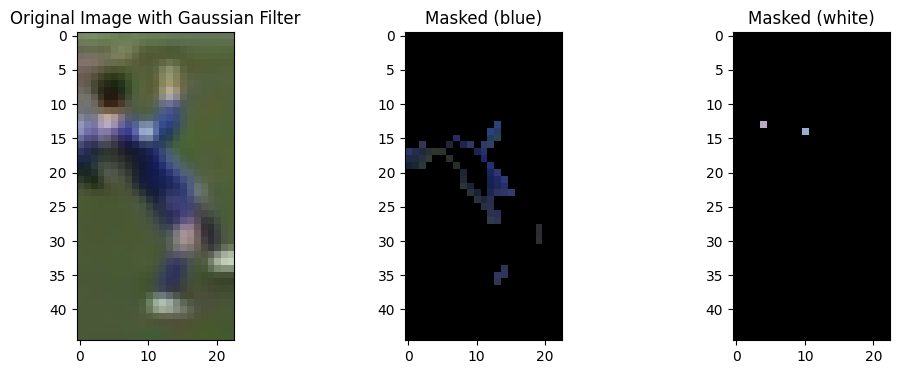

Image: 4.png, Dominant Color: blue


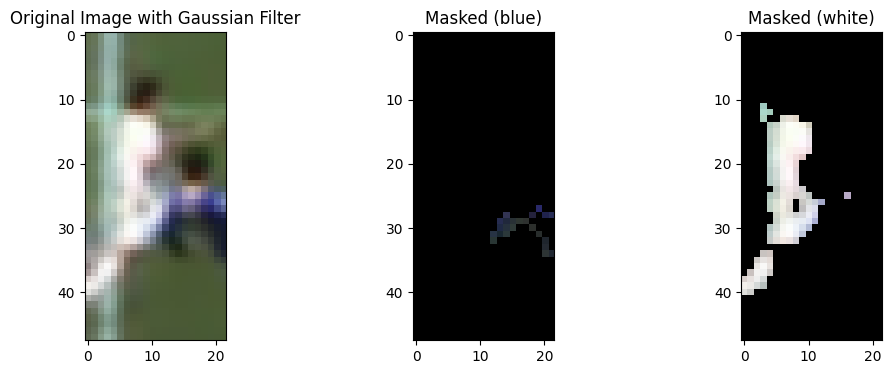

Image: 3.png, Dominant Color: white


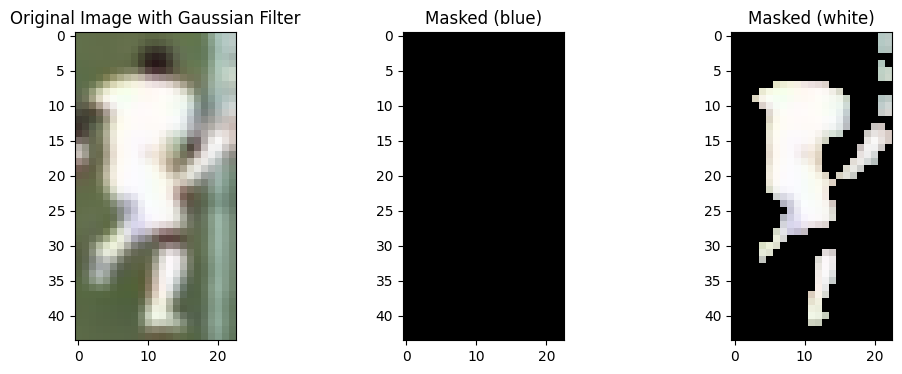

Image: 2.png, Dominant Color: white


In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

color_list = ['blue', 'white']
boundaries = [
    (np.array([43, 31, 4]), np.array([250, 88, 50])),  # blue
    (np.array([187, 169, 112]), np.array([255, 255, 255]))  # white
]

image_folder = 'Color_Classifier_Test_Images'
# You can adjust kernel size and standard deviation as needed
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        # Apply Gaussian filter to the image
        image = cv2.GaussianBlur(image, (3, 3), 0) 

        masked_images = []
        values = []

        for boundary in boundaries:
            mask = cv2.inRange(image, boundary[0], boundary[1])
            masked_images.append(cv2.bitwise_and(image, image, mask=mask))
            non_black_pixels = np.count_nonzero(mask)
            values.append(non_black_pixels)

        dominant_color = color_list[0] if values[0] > values[1] else color_list[1]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Gaussian Filter')

        for i, masked_image in enumerate(masked_images):
            plt.subplot(1, 3, i + 2)
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Masked ({color_list[i]})')

        plt.show()

        print(f'Image: {filename}, Dominant Color: {dominant_color}')


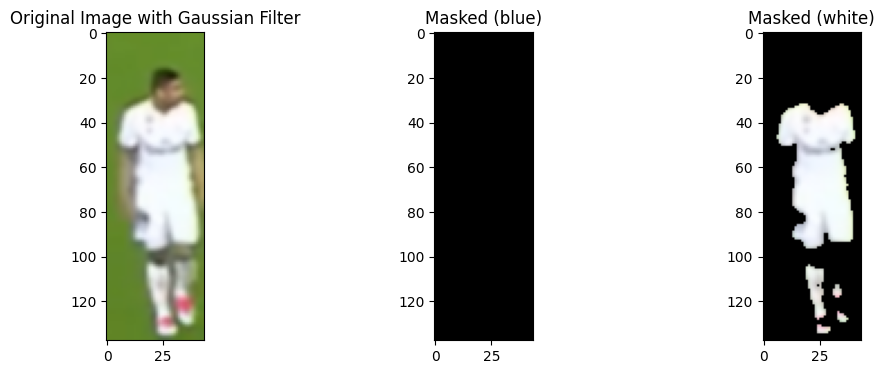

Image: Screenshot_20231029_114841.png, Dominant Color: white


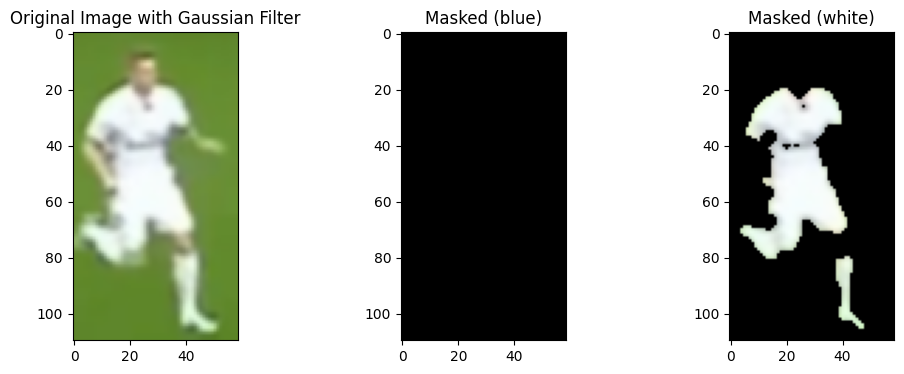

Image: Screenshot_20231029_114841 (3).png, Dominant Color: white


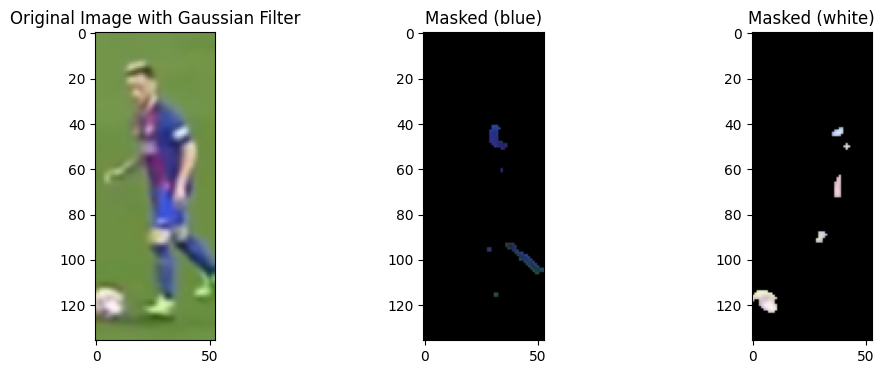

Image: Screenshot_20231029_114841 (6).png, Dominant Color: white


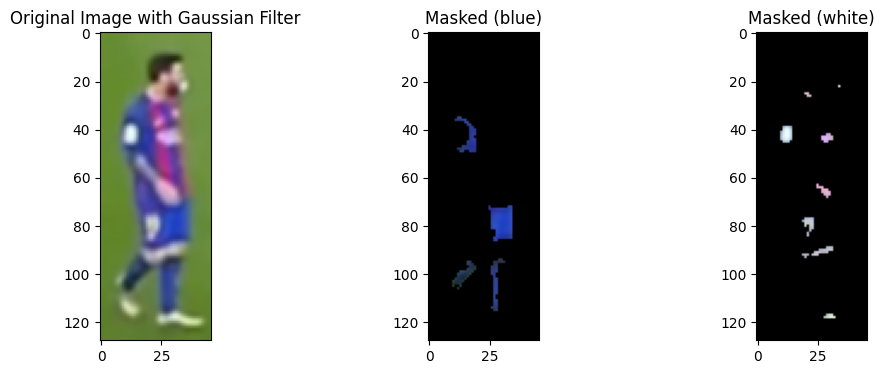

Image: Screenshot_20231029_114841 (1).png, Dominant Color: blue


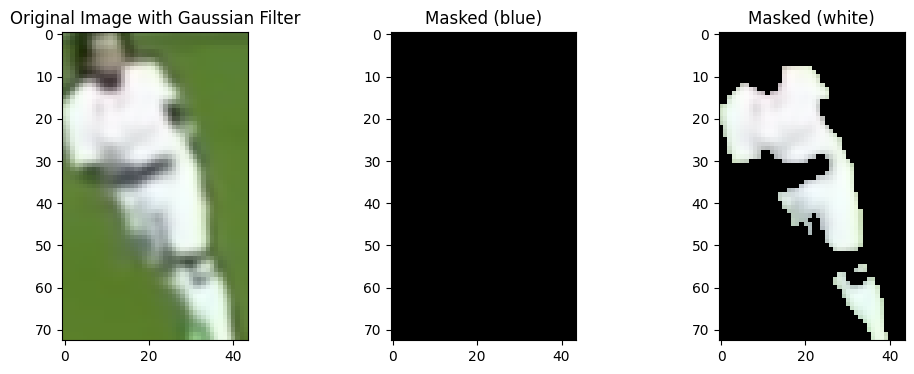

Image: Screenshot_20231029_114841 (4).png, Dominant Color: white


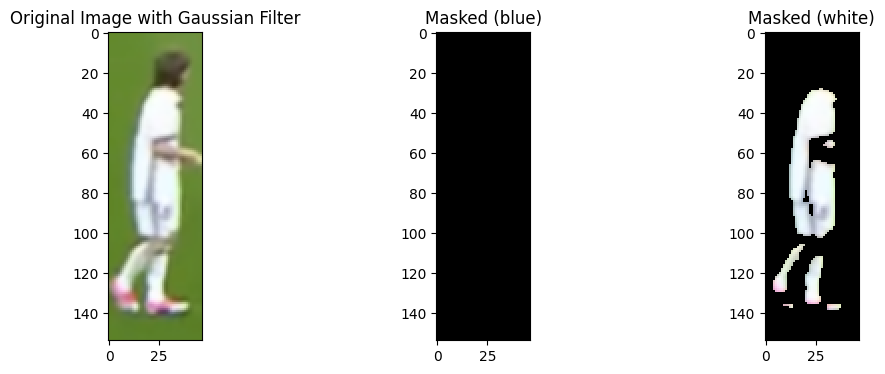

Image: Screenshot_20231029_114841 (2).png, Dominant Color: white


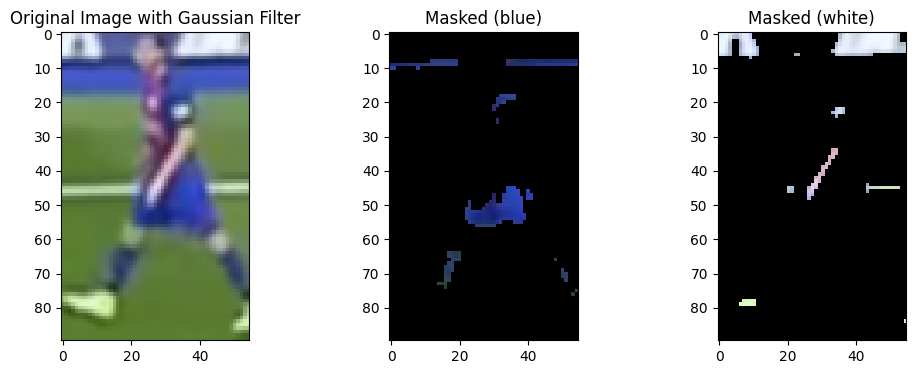

Image: Screenshot_20231029_114841 (5).png, Dominant Color: white


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

color_list = ['blue', 'white']
boundaries = [
    (np.array([43, 31, 4]), np.array([250, 88, 50])),  # blue
    (np.array([187, 169, 112]), np.array([255, 255, 255]))  # white
]

image_folder = 'real_barca'

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        # Apply Gaussian filter to the image
        image = cv2.GaussianBlur(image, (3, 3), 0)

        masked_images = []
        values = []

        for boundary in boundaries:
            mask = cv2.inRange(image, boundary[0], boundary[1])
            masked_images.append(cv2.bitwise_and(image, image, mask=mask))
            non_black_pixels = np.count_nonzero(mask)
            values.append(non_black_pixels)

        dominant_color = color_list[0] if values[0] > values[1] else color_list[1]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image with Gaussian Filter')

        for i, masked_image in enumerate(masked_images):
            plt.subplot(1, 3, i + 2)
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Masked ({color_list[i]})')

        plt.show()

        print(f'Image: {filename}, Dominant Color: {dominant_color}')


**HSV**

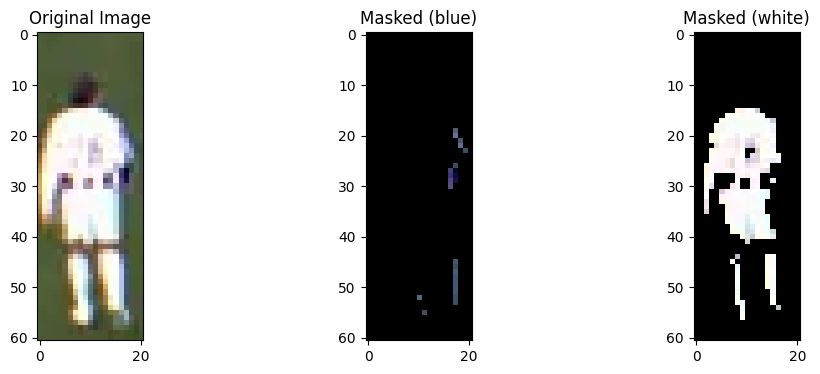

Image: 1.png, Dominant Color: white


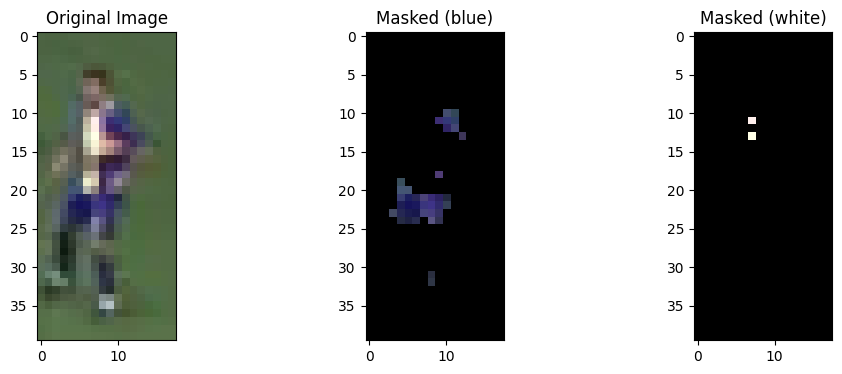

Image: 7.png, Dominant Color: blue


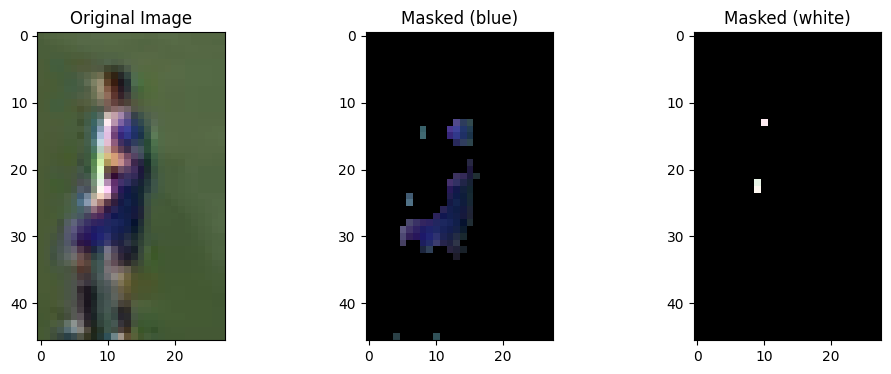

Image: 10.png, Dominant Color: blue


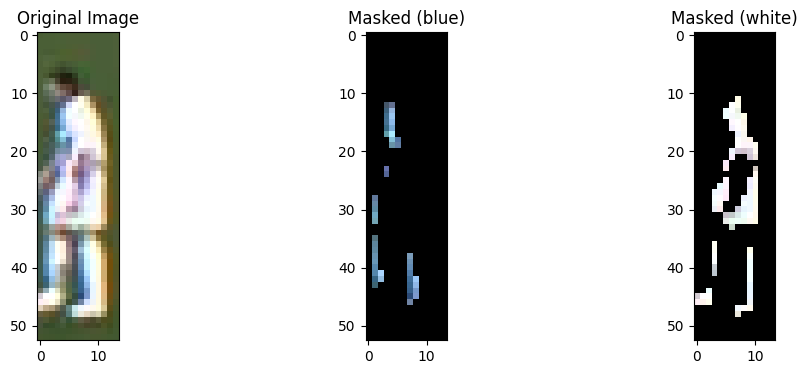

Image: 8.png, Dominant Color: white


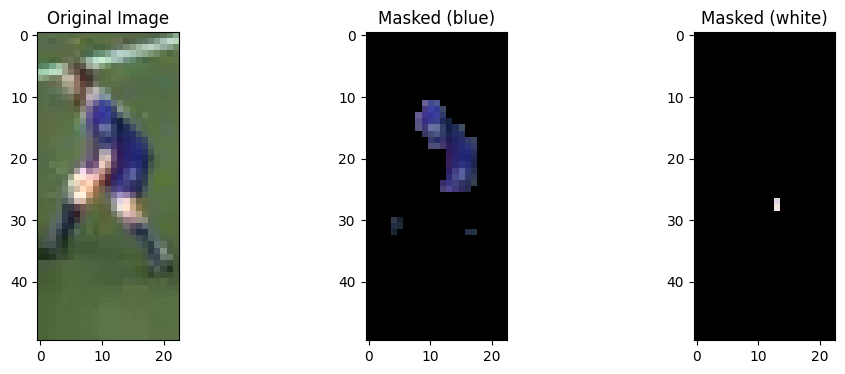

Image: 5.png, Dominant Color: blue


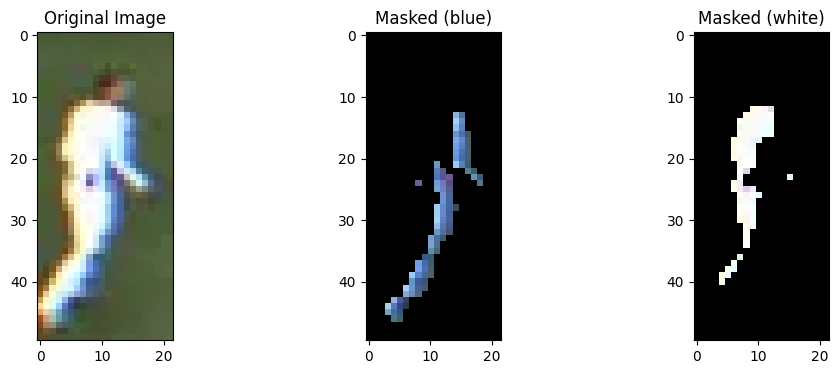

Image: 9.png, Dominant Color: blue


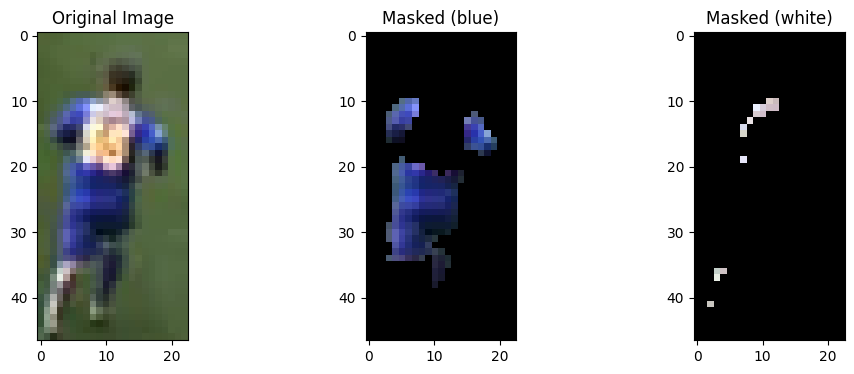

Image: 6.png, Dominant Color: blue


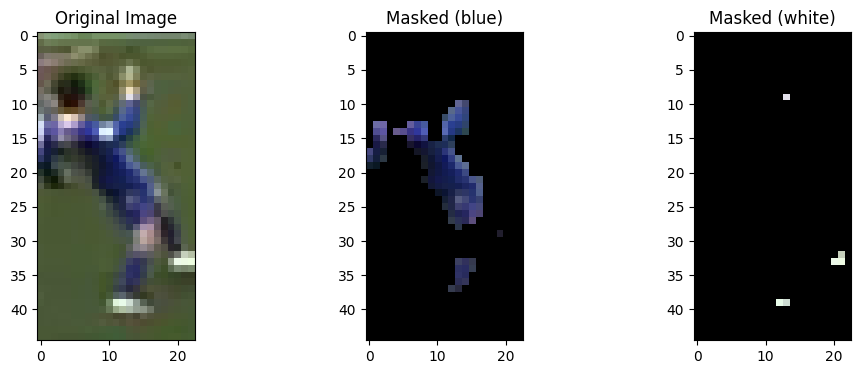

Image: 4.png, Dominant Color: blue


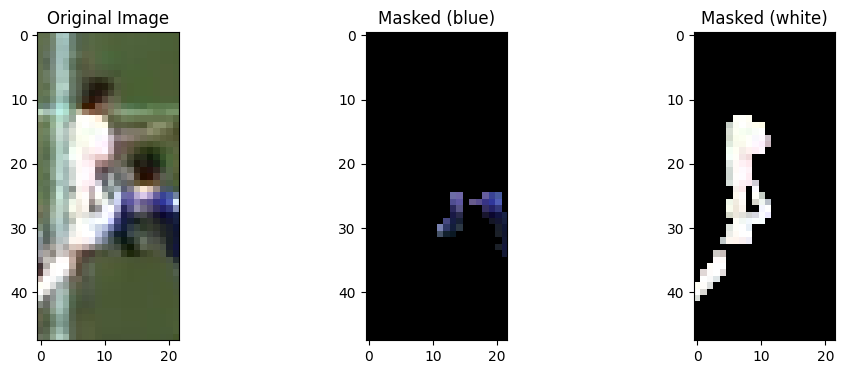

Image: 3.png, Dominant Color: white


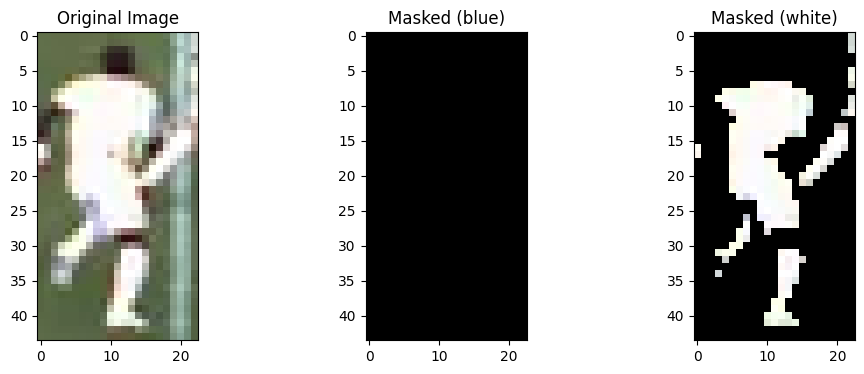

Image: 2.png, Dominant Color: white


In [9]:
import cv2
import numpy as np
import os

color_list = ['blue', 'white']
boundaries = [
    (np.array([94, 80, 2]), np.array([130, 255, 255])),  # Blue in HSV
    (np.array([0, 0, 200]), np.array([180, 25, 255]))  # White in HSV
]

image_folder = 'Color_Classifier_Test_Images'

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)
        
        # Convert the image to HSV
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        masked_images = []
        #ratios = []
        values = []
        

        for boundary in boundaries:
            mask = cv2.inRange(hsv_image, boundary[0], boundary[1])
            masked_images.append(cv2.bitwise_and(image, image, mask=mask))
            non_black_pixels = np.count_nonzero(mask)
            #ratio = non_black_pixels / mask.size
            #ratios.append(ratio)
            values.append(non_black_pixels)

        dominant_color = color_list[0] if values[0] > values[1] else color_list[1]

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        for i, masked_image in enumerate(masked_images):
            plt.subplot(1, 3, i + 2)
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Masked ({color_list[i]})')

        plt.show()

        print(f'Image: {filename}, Dominant Color: {dominant_color}')
